In [1]:
from this_settings import *

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## 1. Load data

In [2]:
## Import cleaned data
data = pd.read_parquet(directory_cleandata+'data_a.parquet')
data = data[(data['year']>=1946) &
            (data['year']<=2020)].copy()

## Demean the data to match Mankiw and Shapiro
## 
data.set_index('year',
               inplace=True)
mean = data.mean()
#std = data.std()
data = data.copy() - mean.copy()
#data = (data.copy() - mean.copy()) / std.copy()
data.reset_index(inplace=True)

## 2. Part a

In [16]:
## Regress returns on DP
reg_r = sm.OLS(endog=data['log_ret'],
               #exog=sm.add_constant(data['log_pd_c_tm1']),
               exog=data['log_pd_c_tm1'],
               missing='drop')\
        .fit()

## Regress PD on lagged PD
reg_pd = sm.OLS(endog=data['log_pd_c'],
                #exog=sm.add_constant(data['log_pd_c_tm1']),
                exog=data['log_pd_c_tm1'],
                missing='drop')\
         .fit()

## Regress D on D
reg_d = sm.OLS(endog=data['log_div_c_yoy'],
               exog=sm.add_constant(data['log_pd_c_tm1']),
               missing='drop')\
        .fit()

## Grab coefficients
b_r_data = reg_r.params['log_pd_c_tm1']
phi_data = reg_pd.params['log_pd_c_tm1']
b_d_data = reg_d.params['log_pd_c_tm1']

In [17]:
rho = data['pd_c'].mean() / (1.0+data['pd_c'].mean())

In [18]:
rho

-1.6200374375330545e-14

In [4]:
## Get coefficients
print(reg_r.summary())

                                 OLS Regression Results                                
Dep. Variable:                log_ret   R-squared (uncentered):                   0.062
Model:                            OLS   Adj. R-squared (uncentered):              0.050
Method:                 Least Squares   F-statistic:                              4.854
Date:                Mon, 11 Apr 2022   Prob (F-statistic):                      0.0307
Time:                        04:17:53   Log-Likelihood:                          32.241
No. Observations:                  74   AIC:                                     -62.48
Df Residuals:                      73   BIC:                                     -60.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [5]:
## Get coefficients
print(reg_pd.summary())

                                 OLS Regression Results                                
Dep. Variable:               log_pd_c   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              537.0
Date:                Mon, 11 Apr 2022   Prob (F-statistic):                    2.20e-35
Time:                        04:17:54   Log-Likelihood:                          36.815
No. Observations:                  74   AIC:                                     -71.63
Df Residuals:                      73   BIC:                                     -69.33
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [6]:
## Get covariance matrix of residuals
e_data = pd.DataFrame({'e_r':reg_r.resid,
                       'e_pd':reg_pd.resid})
e_data_vcv = e_data.cov()

In [7]:
e_data_vcv

,e_r,e_pd
e_r,0.024826,0.006937
e_pd,0.006937,0.021936


## 3. Part b

In [8]:
M=10
N=75
p = e_data.corr().iloc[0,1]
e_sim_cov = np.array([[1,p],
                      [p,1]])

In [9]:
%%time
q3b0 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.0)

CPU times: user 934 ms, sys: 203 ms, total: 1.14 s
Wall time: 696 ms


In [10]:
%%time
q3b01 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.1)

q3b02 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.2)

q3b03 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.3)

q3b04 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.4)

q3b05 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.5)

q3b06 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.6)

q3b07 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.7)

q3b08 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.8)

q3b09 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*0.9)

q3b1 = mankiw_shapiro_quick(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov,
                     phi_data=phi_data*1)

CPU times: user 12.1 s, sys: 1.65 s, total: 13.8 s
Wall time: 4.37 s


In [11]:
br0 = q3b0['stats'].loc['mean','b_r_sim']
br01 = q3b01['stats'].loc['mean','b_r_sim']
br02 = q3b02['stats'].loc['mean','b_r_sim']
br03 = q3b03['stats'].loc['mean','b_r_sim']
br04 = q3b04['stats'].loc['mean','b_r_sim']
br05 = q3b05['stats'].loc['mean','b_r_sim']
br06 = q3b06['stats'].loc['mean','b_r_sim']
br07 = q3b07['stats'].loc['mean','b_r_sim']
br08 = q3b08['stats'].loc['mean','b_r_sim']
br09 = q3b09['stats'].loc['mean','b_r_sim']
br10 = q3b1['stats'].loc['mean','b_r_sim']

phi0 = q3b0['stats'].loc['mean','phi_sim']
phi01 = q3b01['stats'].loc['mean','phi_sim']
phi02 = q3b02['stats'].loc['mean','phi_sim']
phi03 = q3b03['stats'].loc['mean','phi_sim']
phi04 = q3b04['stats'].loc['mean','phi_sim']
phi05 = q3b05['stats'].loc['mean','phi_sim']
phi06 = q3b06['stats'].loc['mean','phi_sim']
phi07 = q3b07['stats'].loc['mean','phi_sim']
phi08 = q3b08['stats'].loc['mean','phi_sim']
phi09 = q3b09['stats'].loc['mean','phi_sim']
phi10 = q3b1['stats'].loc['mean','phi_sim']

In [12]:
plot = pd.DataFrame({'lambda':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                     'b_r':[br0,br01,br02,br03,br04,br05,br06,br07,br08,br09,br10],
                     'phi':[phi0,phi01,phi02,phi03,phi04,phi05,phi06,phi07,phi08,phi09,phi10]})

In [19]:
plot['br_implied'] = rho* plot['phi'].copy() + b_d_data - 1.0

In [20]:
plot

,lambda,b_r,phi,br_implied
0,0.0,0.264287,0.012887,-1.024429
1,0.1,0.265696,0.108668,-1.024429
2,0.2,0.262360,0.204475,-1.024429
3,0.3,0.254143,0.299661,-1.024429
4,0.4,0.240905,0.393616,-1.024429
5,0.5,0.222380,0.485833,-1.024429
6,0.6,0.198034,0.575979,-1.024429
7,0.7,0.166981,0.663977,-1.024429
8,0.8,0.128229,0.750203,-1.024429
9,0.9,0.082193,0.836351,-1.024429


In [ ]:
b_r_data

-0.09551542632903672

In [ ]:
directory_figures

'../Figures/'

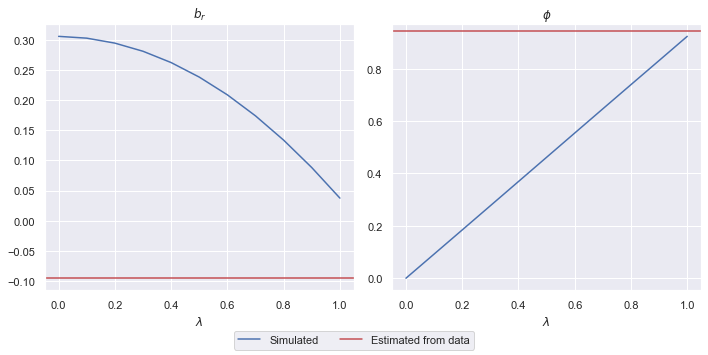

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

plot.set_index('lambda')['b_r'].plot(ax=axes[0],label='Simulated')
axes[0].axhline(y=b_r_data,color='r',linestyle='-',label='Estimated from data')
axes[0].title.set_text('$b_r$')
axes[0].set_xlabel('$\lambda$')

plot.set_index('lambda')['phi'].plot(ax=axes[1])
axes[1].axhline(y=phi_data,color='r',linestyle='-')
axes[1].title.set_text('$\phi$')
axes[1].set_xlabel('$\lambda$')

handles, labels = axes[0].get_legend_handles_labels()#
fig.legend(handles, labels, loc='lower center',ncol=2)

plt.tight_layout()
#plt.subplots_adjust(top=0.925)
plt.subplots_adjust(bottom=0.175)

plt.savefig(directory_figures+'q3.png',
            bbox_inches='tight',
            dpi=150)

In [ ]:
print('here')

In [18]:
q3b['stats'].to_parquet('../Output/q3b_stats_std.parquet')
q3b['results'].to_parquet('../Output/q3b_results_std.parquet')

In [20]:
q3b['stats']

,b_r_sim,phi_sim
mean,0.038986,0.921879
std,0.045979,0.048743


## 4. Part c

In [15]:
e_sim_cov0 = np.array([[1,0],
                       [0,1]])

In [16]:
%%time
q3c = mankiw_shapiro(M=M,
                     N=N,
                     e_sim_cov=e_sim_cov0,
                     phi_data=phi_data)

CPU times: user 20min 7s, sys: 37.5 s, total: 20min 44s
Wall time: 5min 35s


In [17]:
print('here')

here


In [18]:
#q3c['stats'].to_parquet('../Output/q3c_stats.parquet')
#q3c['results'].to_parquet('../Output/q3c_results.parquet')

In [8]:
q3c_stats = pd.read_parquet('../Output/q3c_stats.parquet')

In [9]:
q3c_stats

,b_r_sim,phi_sim
mean,0.000003,0.923749
std,0.043724,0.048330


In [212]:
##Don't forget to set the seed!
rng = np.random.default_rng(seed)

In [213]:
## Following Mankiw and Shapiro

## Draw e_r and e_pd from size-N bivarioate normal
## variances=1, covariance= corr(e_r,e_pd)
## ordered as e_r, e_pd
e_sim = rng.multivariate_normal(mean=[0,0],
                                cov=np.array([[1,p],
                                              [p,1]]),
                                size=N)
e_r_sim = e_sim[:,0]
e_pd_sim = e_sim[:,1]

## Set Y=v_t
## Set r = e_r_sim
r_sim = e_r_sim

## Generate X+t from eq 3 using innovations e
## Generate pd_t from pd AR(1) using innovations e_pd
## Initial value pd_0 is random from univariate normal, mean 0 and variance 1/(1-phi^2)
## Note: initial value gets used so we keep number of observations = N in the regression
## of pd(t) on pd(t-1)
pd_sim_0 = rng.normal(loc=0,
                      scale=np.sqrt(1.0/(1.0-phi_data**2))) # SD
pd_sim_panda = pd.DataFrame({'e_pd':e_pd_sim})
pd_sim_panda['pd'] = np.nan
pd_sim_panda.loc[0,'pd'] = pd_sim_0
for t in range(1,len(pd_sim_panda)+2):
    if t==0:
        pd_sim_tm1 = pd_sim_0
    if t>0:
        pd_sim_tm1 = pd_sim_panda.loc[t-1,'pd'].copy()
    if t==len(pd_sim_panda)+1:
        pd_sim_panda.loc[t,'pd'] = np.nan
        break
    pd_sim_panda.loc[t,'pd'] = phi_data * pd_sim_tm1 + pd_sim_panda.loc[t-1,'e_pd'].copy()
pd_sim_panda['pd_tm1'] = pd_sim_panda['pd'].copy().shift()
pd_sim_panda.dropna(subset=['pd','pd_tm1'],
                    inplace=True)
pd_sim = pd_sim_panda['pd'].copy().values
pd_sim_tm1 = pd_sim_panda['pd_tm1'].copy().values

## Estimate equation 2, grab t-stat
## Estimate return regression using generated data
reg_r_sim = sm.OLS(endog=r_sim,
                   exog=pd_sim,)\
            .fit()

## Estimate pd regression using generated data
reg_pd_sim = sm.OLS(endog=pd_sim,
                    exog=pd_sim_tm1,)\
             .fit()
             
## Grab regression coefficients
b_r_sim = reg_r_sim.params[0]
phi_sim = reg_pd_sim.params[0]

In [214]:
b_r_sim

0.005840191050040267

In [215]:
b_r_sim

0.005840191050040267

In [204]:
phi_sim

0.9644423919636502

In [ ]:
phi_sim

0.9644423919636502

In [168]:
print(reg_r_sim.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.5842
Date:                Sun, 10 Apr 2022   Prob (F-statistic):                       0.447
Time:                        23:18:08   Log-Likelihood:                         -93.472
No. Observations:                  75   AIC:                                      188.9
Df Residuals:                      74   BIC:                                      191.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [169]:
print(reg_pd_sim.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.663
Model:                            OLS   Adj. R-squared (uncentered):              0.658
Method:                 Least Squares   F-statistic:                              145.5
Date:                Sun, 10 Apr 2022   Prob (F-statistic):                    3.83e-19
Time:                        23:18:17   Log-Likelihood:                         -111.26
No. Observations:                  75   AIC:                                      224.5
Df Residuals:                      74   BIC:                                      226.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------